`machine learning course 2025 (с) mssvctr`

## Torch

In [ ]:
!pip install torch torchvision matplotlib -q

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Как работает регуляризация:

```
image = (image - mean) / std

# mean, std = 0.5, 0.5
# значения тензора изображений попадут в диапзон [-1,1]
# допустим, фактический минимум = 0, а максимум = 1
# (0 - 0.5) / 0.5 = -1 (минимум после регуляризации)
# (1 - 0.5) / 0.5 = 1  (максимум после регуляризации)
```

In [ ]:
# преобразование изображений к виду тензоров + регуляризация
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# загрузка датасета через torchvision
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

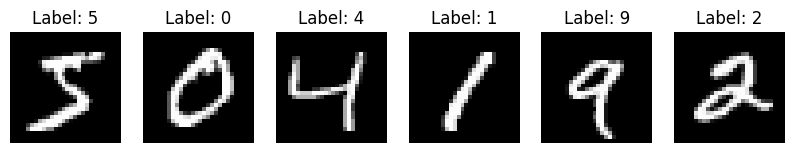

In [14]:
def show_mnist_samples(dataset, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images):
        img, label = dataset[i]
        img = img.squeeze()
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.show()

show_mnist_samples(train_dataset)

Какие еще датасеты доступны в torchvision?

- найдите данные
- загрузите датасеты
- выведите 1 сэмпл с помощью кода на Python
- назовите задачу, которая решается с помощью этого датасета

In [4]:
class FFN(nn.Module):
    def __init__(self):
        super(FFN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten - приводим к виду одномерного вектора
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FFN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# обучение
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/5, Loss: 0.3788
Epoch 2/5, Loss: 0.1775
Epoch 3/5, Loss: 0.1321
Epoch 4/5, Loss: 0.1083
Epoch 5/5, Loss: 0.0930


Произведите настройку гиперпараметров и переобучите модель:

- измените архитектуру модели
  - какие настройки вы не можете изменить?
  - измените размер слоев
  - замените функции активации, функцию потерь или оптимизатор, ориентируясь на документацию PyTorch
- измените гиперпараметры
  - learning rate
  - epochs

### TF

In [ ]:
!pip install tensorflow matplotlib -q

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
# загрузка датасета
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# регуляризация
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


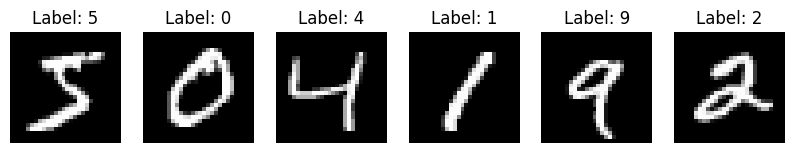

In [15]:
def show_mnist_samples_tf(x, y, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images):
        axes[i].imshow(x[i], cmap="gray")
        axes[i].set_title(f"Label: {y[i]}")
        axes[i].axis("off")
    plt.show()

show_mnist_samples_tf(x_train, y_train)

Какие еще датасеты доступны в tf?

Выберите любой датасет из tf, загрузите его и покажите 1 сэмпл. Опишите его свойства и сферы применения

In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8555 - loss: 0.4958 - val_accuracy: 0.9572 - val_loss: 0.1396
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9640 - loss: 0.1199 - val_accuracy: 0.9701 - val_loss: 0.0980
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9756 - loss: 0.0809 - val_accuracy: 0.9746 - val_loss: 0.0812
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9819 - loss: 0.0582 - val_accuracy: 0.9769 - val_loss: 0.0761
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9878 - loss: 0.0396 - val_accuracy: 0.9796 - val_loss: 0.0684


In [11]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0792
Test Accuracy: 97.96%


Произведите аналогичную настройку гиперпараметров.

Чем отличаются библиотеки?